In [1]:
import pyspark
import os

In [2]:
SUBMIT_ARGS = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

spark = pyspark.sql.SparkSession.builder.appName("Cora").getOrCreate()

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import tensorflow as tf

In [4]:
links_pd = pd.read_csv("./data/cora/cora.cites", sep="\t", header=None)
nodes_pd = pd.read_csv("./data/cora/cora.content", sep="\t", header=None)

In [5]:
print(nodes_pd.shape, links_pd.shape)

(2708, 1435) (5429, 2)


In [6]:
nodes_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [7]:
link_list = links_pd[[1, 0]].values.tolist()

In [8]:
g = nx.DiGraph(link_list, name="cora")

In [9]:
adj = nx.adjacency_matrix(g)

/tmp/ipykernel_10799/2906892871.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(g)


In [10]:
nx.to_pandas_adjacency(g)

,1033,35,103482,103515,1050679,1103960,1103985,1109199,1112911,1113438,...,815073,820661,817774,1139009,824245,1140231,853114,853155,853115,853118
1033,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
853115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


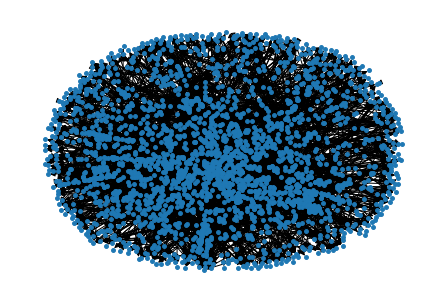

In [11]:
nx.draw(g, node_size=15)

In [12]:
node_list = list(g.nodes)

In [13]:
train_mask = []
test_mask = []
for i in range(len(node_list)):
    if np.random.rand() > 0.3:
        test_mask.append(0)
        train_mask.append(1)
    else:
        test_mask.append(1)
        train_mask.append(0)

train_mask = np.ma.make_mask(train_mask)
test_mask = np.ma.make_mask(test_mask)

In [14]:
list(zip(train_mask, test_mask))
sum(train_mask*test_mask)

0

In [15]:
nodes_desired_order = pd.DataFrame(node_list)
nodes_ordered = nodes_desired_order.set_index(0).join(nodes_pd.set_index(0), how="inner").iloc[:, :1433].to_numpy(dtype="float32")
labels = nodes_desired_order.set_index(0).join(nodes_pd.set_index(0), how="inner").iloc[:, 1433].to_numpy()

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels_ohe = ohe.fit_transform(np.expand_dims(labels, 1))

In [17]:
labels_ohe.A

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [18]:
ohe.categories_

[array(['Case_Based', 'Genetic_Algorithms', 'Neural_Networks',
        'Probabilistic_Methods', 'Reinforcement_Learning', 'Rule_Learning',
        'Theory'], dtype=object)]

The scipy.sparse.*_matrix has several useful methods, for example, if a is e.g. scipy.sparse.csr_matrix:
a.toarray() or a.A - Return a dense ndarray representation of this matrix. (numpy.array, recommended) a.todense() or a.M - Return a dense matrix representation of this matrix. (numpy.matrix)

In [19]:
adj = adj.astype("float32").A + np.eye(labels.shape[0])
labels_ohe = labels_ohe.astype("float32").A

In [20]:
def masked_softmax_cross_entropy(logits, labels, mask):
    loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels)
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.reduce_mean(mask)
    loss *= mask

    return tf.reduce_mean(loss)

def masked_accuracy(logits, labels, mask):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy_all = tf.cast(correct_prediction, tf.float32)
    mask = tf.cast(mask, tf.float32)
    mask /= tf.reduce_mean(mask)
    accuracy_all *= mask

    return tf.reduce_mean(accuracy_all)

def gnn(fts, adj, transform, activation):
    seq_fts = transform(fts)
    ret_fts = tf.matmul(adj, seq_fts)

    return activation(ret_fts)

def train_cora(fts, adj, labels,gnn_fn, units, epochs, lr):
    lyr_1 = tf.keras.layers.Dense(units)
    lyr_2 = tf.keras.layers.Dense(7)

    def cora_gnn(fts, adj):
        hidden = gnn_fn(fts, adj, lyr_1, tf.nn.relu)
        logits = gnn_fn(hidden, adj, lyr_2, tf.identity)
        return logits

    optimizer = tf.keras.optimizers.Adam(lr)

    best_accuracy = 0.0

    for epoch in range(epochs+1):
        with tf.GradientTape() as tape:
            logits = cora_gnn(fts, adj)
            loss = masked_softmax_cross_entropy(logits, labels, train_mask)

        variables = tape.watched_variables()
        grads = tape.gradient(loss, variables)
        optimizer.apply_gradients(zip(grads, variables))

        logits = cora_gnn(fts, adj)
        train_accuracy = masked_accuracy(logits, labels, train_mask)
        test_accuracy = masked_accuracy(logits, labels, test_mask)

        if train_accuracy > best_accuracy:
            best_accuracy = train_accuracy
            print(f"Epoch {epoch}| Training Loss: {loss.numpy()}| Val Accuracy: {train_accuracy.numpy()}| Test Accuracy: {test_accuracy.numpy()}")

In [21]:
train_cora(nodes_ordered, adj.astype("float32"), labels_ohe, gnn, 32, 200, 0.01)

Epoch 0| Training Loss: 2.1718618869781494| Val Accuracy: 0.4888298511505127| Test Accuracy: 0.5108695030212402
Epoch 1| Training Loss: 1.5363376140594482| Val Accuracy: 0.706915020942688| Test Accuracy: 0.7016907334327698
Epoch 2| Training Loss: 1.0972026586532593| Val Accuracy: 0.8026595711708069| Test Accuracy: 0.8019322752952576
Epoch 3| Training Loss: 0.8728541135787964| Val Accuracy: 0.8398935794830322| Test Accuracy: 0.8200481534004211
Epoch 4| Training Loss: 0.7618788480758667| Val Accuracy: 0.8531914353370667| Test Accuracy: 0.8272945880889893
Epoch 5| Training Loss: 0.687488853931427| Val Accuracy: 0.8659573197364807| Test Accuracy: 0.8417873382568359
Epoch 6| Training Loss: 0.6255645751953125| Val Accuracy: 0.8781914114952087| Test Accuracy: 0.8454105854034424
Epoch 7| Training Loss: 0.574877917766571| Val Accuracy: 0.889361560344696| Test Accuracy: 0.8478261232376099
Epoch 8| Training Loss: 0.530254602432251| Val Accuracy: 0.8962764739990234| Test Accuracy: 0.85144919157028